In [1]:
%pip install wordcloud
%pip install spacy
%pip install pattern
%python -m spacy download en_core_web_sm
%pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python311\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python311\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python311\python.exe -m pip install --upgrade pip' command.
UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


In [3]:
# Import the relevant modules (libraries/packages)
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
import requests
from bs4 import BeautifulSoup
import random
from wordcloud import WordCloud
import os
import spacy

import warnings

warnings.filterwarnings("ignore")


In [4]:
# spacy makes it easy to build systems for information extraction.

import spacy    # processing such as POS tagging
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob      # textblob is a python library for processing text

from pattern.en import sentiment

In [5]:
urls=[]

#In this cell append the urls of the web articles that you are scrapping and replace these because they have already been scrapped
urls.append('https://www.ips.lk/talkingeconomics/2023/03/08/digitall-are-sri-lankan-women-abandoned-in-digital-transformation/')
urls.append('https://www.cambridge.org/core/journals/bjpsych-international/article/gender-disparity-as-a-threat-to-the-mental-wellbeing-of-young-sri-lankan-women/EDC6E0C5235A91B8855C932A57E9623E')
urls.append('https://www.graygroupintl.com/blog/gender-bias')
urls.append('https://www.undp.org/srilanka/press-releases/breakthebias-supporting-gender-equal-world-today-sustainable-tomorrow')
urls.append('https://www.unfpa.org/resources/frequently-asked-questions-about-gender-equality#:~:text=Gender%20equality%20is%20intrinsically%20linked,in%20all%20spheres%20of%20life.')
urls.append('https://www.sciencedirect.com/science/article/abs/pii/S0277539519304832')
urls.append('https://www.dailymirror.lk/news-features/Can-a-male-cop-search-my-handbag-Apparently-the-answer-is-yes/131-273959')
urls.append('https://roar.media/english/life/current-affairs/hit-on-and-run-hazards-of-being-female-in-sri-lanka')
urls.append('https://island.lk/harassment-of-women-in-politics-on-the-rise/')
urls.append('https://unfoundation.org/blog/post/2018-year-in-review-a-candid-conversation-gender-equality/')
urls.append('https://asiapacific.unwomen.org/en/news-and-events/stories/2021/08/what-did-a-series-of-conversations-on-gender-equality-in-sri-lanka-reveal')
urls.append('https://www.advocata.org/commentary-archives/2023/05/14/https/wwwthemorninglk/articles/hkuae7ivyueeg60ci458#:~:text=The%20matter%20can%20be%20addressed,by%20a%20person%20in%20authority.')
urls.append('https://cmb.ac.lk/policy-against-sexual-harassment')
urls.append('https://www.womeninjournalism.org/threats-all/sri-lanka-cfwij-demands-investigation-into-sexual-harassment-of-tv-anchor-ishara-dewendra-by-network-official')
urls.append('https://www.unodc.org/southasia/frontpage/2012/March/sri-lanka_-empowering-women-and-vulnerable-communities-to-strengthen-democracy-and-good-governance.html')
urls.append('https://srilanka.un.org/en/222596-sri-lanka-adopts-first-national-action-plan-women-peace-and-security')
urls.append('https://www.ips.lk/talkingeconomics/2018/03/08/economically-empowering-sri-lankan-women-one-strategy-does-not-fit-all/')
urls.append('https://www.undp.org/srilanka/blog/celebrating-rural-women-heroes-enhancing-sri-lankas-food-security')
urls.append('https://mayamiko.com/blogs/mayamiko-moments/amma-sri-lanka-women-empowerment-through-crafts')
urls.append('https://blog.bti-project.org/2014/12/22/what-is-holding-women-back-in-sri-lanka/')
urls.append('https://grameenfoundation.org/stories/blog/wage-sri-lanka-holistically-empowering-women-leaders')
urls.append('https://www.opendemocracy.net/en/5050/domestic-violence-in-sri-lanka-power-of-alternative-discourse/')
urls.append('https://srilanka16days.wordpress.com/2011/11/29/guest-post-roel-tells-her-story/')
urls.append('https://www.colombotelegraph.com/index.php/are-children-safe-from-abuse-in-sri-lanka/')
urls.append('https://alanaathletica.com/blogs/news/socialimpact2')
urls.append('https://blogs.worldbank.org/endpovertyinsouthasia/improve-female-labour-force-participation-sri-lanka-first-change-attitudes')
urls.append('https://demofinland.org/en/women-are-making-their-voice-heard-in-sri-lankan-local-politics/')
urls.append('https://www.brookings.edu/articles/whats-holding-sri-lankan-women-back-from-participating-in-the-labor-force/')
urls.append('https://www.brookings.edu/articles/why-arent-sri-lankan-women-translating-their-educational-gains-into-workforce-advantages/')
urls.append('https://www.undp.org/asia-pacific/blog/navigating-vulnerability-insights-sri-lankas-multidimensional-vulnerability-index')
urls.append('https://reliefweb.int/report/sri-lanka/understanding-multidimensional-vulnerabilities-impact-people-sri-lanka')
urls.append('https://blogs.worldbank.org/endpovertyinsouthasia/sri-lankas-crisis-offers-opportunity-reset-its-development-model')
urls.append('https://blogs.worldbank.org/endpovertyinsouthasia/resilience-sri-lankas-strength-navigate-uncertain-future')
urls.append('https://blogs.lse.ac.uk/southasia/2023/01/02/economic-crisis-inflation-and-poverty-in-sri-lanka/')
urls.append('https://www.compassion.com.au/blog/asia-in-focus-poverty-in-sri-lanka')
urls.append('https://blogs.lse.ac.uk/wps/2021/11/25/why-sri-lanka-should-leverage-the-women-peace-and-security-agenda-in-its-covid-19-recovery/')
urls.append('https://www.ips.lk/talkingeconomics/2022/03/08/breaking-the-bias-increasing-womens-political-participation-in-sri-lanka/')
urls.append('https://thediplomat.com/2021/03/gendered-land-sri-lankan-women-battle-unequal-access-to-resources/')
urls.append('https://fashioninstitute.mmu.ac.uk/research/the-forgotten-garment-workers-life-stories-of-marginalised-women-in-sri-lankas-export-apparel-industry/')
urls.append('https://blogs.lse.ac.uk/southasia/2014/04/18/womens-experiences-of-local-justice/')

In [6]:
#This will store sentences of all the articles 
sentence=[]

Please check Peter's notebook https://dagshub.com/Omdena/BCS-Sri-Lanka/src/main/Tasks/Task2-Data-Processing/women&child2.ipynb for understanding of the following cells

In [7]:
for i in range(len(urls)):

    # Use request package to make a GET request for the website.
    req =requests.get(urls[i])

    # using the correct encoding of html page
    req.encoding = 'utf-8'
    
    html = req.text

    soup = BeautifulSoup(html)

    text = soup.get_text()

    clean_text= text.replace("\n", " ")

    clean_text= clean_text.replace("/", " ")

    clean_text= ''.join([c for c in clean_text if c != "\'"])

    tokens = nlp(clean_text)
    for sent in tokens.sents:
     sentence.append((sent.text.strip()))

In [11]:
textblob_sentiment=[]

for s in sentence:
    txt= TextBlob(s)

    textblob_sentiment.append([s])

In [12]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence'])

In [10]:
# condition to check how many urls were not granted access to data
text=df_textblob['Sentence'][0]
df_textblob[df_textblob['Sentence']==text]

,Sentence
0,403 - Forbidden | Access to this page is forbi...
1136,403 - Forbidden | Access to this page is forbi...
2640,403 - Forbidden | Access to this page is forbi...


# Word Cloud

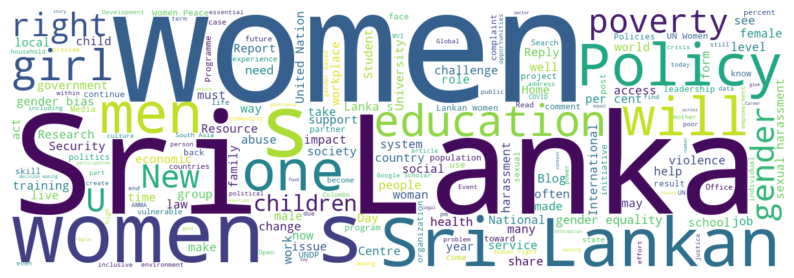

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine the text from the DataFrame column
text = ' '.join(df_textblob['Sentence'])

# Create and generate the word cloud
wordcloud = WordCloud(width=1200, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Saving Data to Csv


In [14]:
df_textbob2 = df_textblob

In [15]:
# Specify the CSV file path
csv_file_path = r'C:\Users\hamza\OneDrive\Desktop\Jupiter Notebooks\BCS_srilanka_scrap\srilanka_data.csv'

# Save the DataFrame to a CSV file
df_textbob2.to_csv(csv_file_path, index=False)

print(f"DataFrame saved to CSV file: {csv_file_path}")

DataFrame saved to CSV file: C:\Users\hamza\OneDrive\Desktop\Jupiter Notebooks\BCS_srilanka_scrap\srilanka_data.csv
